# Code Graveyard

For our own reference. Code that we have removed from our project but may require again are dumped here.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

# Import essential models and functions from sklearn
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

sb.set() # set the default Seaborn style for graphics

### Dropping Outliers

We should also drop any outliers that may affect our model. We can observe some outliers for trestbps, chol, thalach and oldpeak variables from the boxplots. Let us begin by removing them.

In [ ]:
# We remove all the outliers all at once so that it does not affect the quantiles of future variables.
# To do this, we first store the lower and upper bounds of each variable in a list. 

lst = []

for v in num_var:
    IRQ = clean_data[v].quantile(0.75) - clean_data[v].quantile(0.25)
    upper = clean_data[v].quantile(0.75) + IRQ * 1.5
    lower = clean_data[v].quantile(0.25) - IRQ * 1.5
    outliers = clean_data[v][(clean_data[v] < lower) | (clean_data[v] > upper)]
    print(f"{v}: {outliers.shape[0]}")
    lst.append((lower, upper))

lst = list(zip(num_var, lst))

for v, (lower, upper) in lst:
    clean_data = clean_data[(clean_data[v] >= lower) & (clean_data[v] <= upper)]

print("\nNew dimension of clean_data:", clean_data.shape)

### Fixing Skew

We can also observe some skew for many of the numerical variables. Let us take a closer look at each of their skews by calling `.skew()` on each of the variables.

In [11]:
for v in num_var:
    print(f"{v}: {clean_data[v].skew().round(2)}")

age: -0.21
trestbps: 0.29
chol: 0.19
thalach: -0.43
oldpeak: 0.92


We can see that the skew values of `age`, `trestbps`, `chol` and `thalach` are below 0.5 and thus quite low. However, `oldpeak` has a very high positive skew value of 0.92, and we should address this. 

### Checking for Imbalance (Numerical Data)

To check for imbalance in numerical variables, we will be taking a look at their distributions as compared to the normal distribution. Since our dataset is relatively large (999 entries) we would expect a normal distribution if our dataset is balanced. We will be using a Quantile-Quantile (Q-Q) plot to check against a normal distribution.

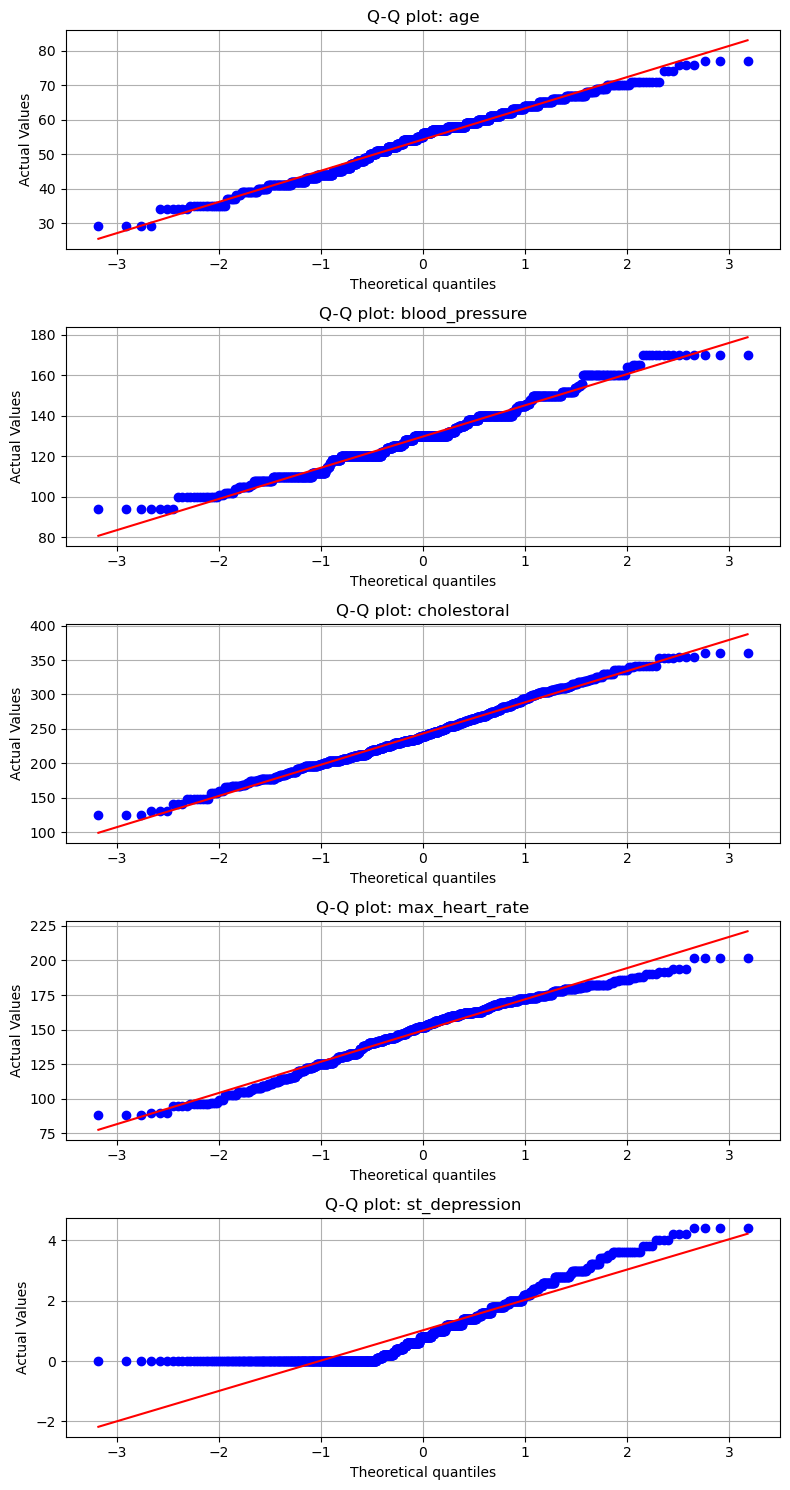

In [9]:
# Import the plot library
import matplotlib.pyplot as plt

# Import the stats library to use probplot
import scipy.stats as stats

# Loop through the numerical columns, ignoring index
f, axes = plt.subplots(5, 1, figsize = (8, 15))
for i, var in enumerate(num_var[1:]):
    ax = axes[i]
    stats.probplot(clean_data[var], dist="norm", plot=ax)
    ax.set_title(f'Q-Q plot: {var}')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel('Actual Values')
    ax.grid(True)
    
plt.tight_layout()
plt.show()

### Intepreting our Q-Q Plots

Based on the graphs above we can see that most of them follow a normal distribution. Although there are some outliers in place the methods that we will be using later on are not sensitive to outliers, hence there is no need to correct most of our data for imbalance./

However we can see an abnormally in our Q-Q plots for `st_depression`. This is because `st_depression` is only able to start from 0. To better understand the `st_depression` data that we are working with lets take a look at the distribution of `st_depression`./

We will also be taking a look at the skew of `st_depression`.

Skewness of st_depression: 0.10112254711609758


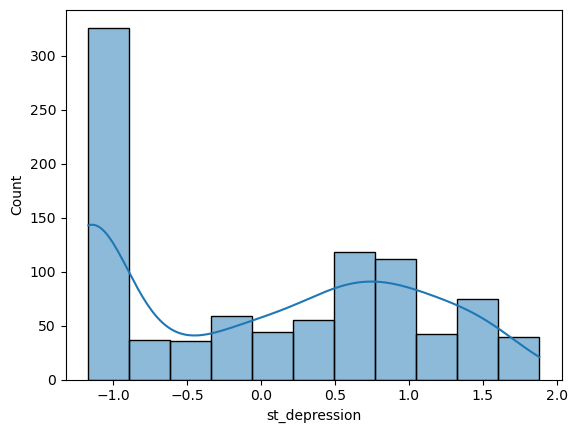

In [11]:
#Importing Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit the transformer with st_depression
pt.fit(clean_data[["st_depression"]])

# Transform the st_depression
# We use clean_data.loc to remove the error of python being unsure of whether its modifying the copy or original
clean_data.loc[:, "st_depression"] = pt.transform(clean_data[["st_depression"]])

#Check again for skewness and replot to see a difference
sb.histplot(data = clean_data["st_depression"],kde = True)

print("Skewness of st_depression: {}".format(clean_data["st_depression"].skew()))


### Reanalysing st_depression data

Taking a look at our new st_depression data, we can see that the imbalanced has been relatively fixed as the skewness is greatly reduced from ~1 to ~0.1